In [ ]:
# https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system

# 캐글 데이터 참고


In [ ]:
# 1. 인구 통계학 필터링
#   많은 사람들이 일반적으로 좋아하는 영화를 추천 (매출순, 인기순, 평점 좋은순)

# 2. 컨텐츠 기반 필터링
#   특정 아이템의 기반한 유사한 아이템을 추천(장르, 감독, 줄거리, 캐스팅, 장소, 시간적배경 등 영화와 관련된 서로 유사한 아이템을 추천)

# 3. 협업 필터링
#   비슷한 영화 취향을 가진사람을 매칭 (영화요소x, abc -> ac 일 경우 b를 추천, 구매이력, 평가이력을 바탕으로 추천)


In [ ]:
# 1. 인구 통계학 필터링


In [2]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/project/추천/tmdb_5000_credits.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/project/추천/tmdb_5000_movies.csv')



In [ ]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
df2.iloc[0]

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [ ]:
df1.shape , df2.shape

((4803, 4), (4803, 20))

In [ ]:
# id를 통해서 두 데이터프레임을 병합



In [ ]:
# 두 컬럼이 동일한지 확인하는 함수 equals
df1['title'].equals(df2['title'])


True

In [ ]:
# df1.columns


Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [ ]:
# 컬럼명 id로 변경
df1.columns = ['id', 'title', 'cast', 'crew']

In [ ]:
df1[['id', 'cast', 'crew']] #title은 겹치므로 제거


,id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...
4798,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [ ]:
df2 = df2.merge(df1[['id', 'cast', 'crew']], on='id') # id를 기준으로 df2에 df1을 병합시킴


In [ ]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### 인구통계학적 필터링

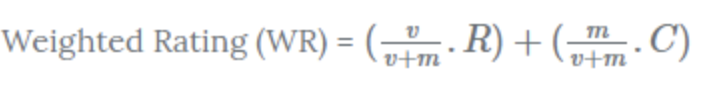

#v : 영화에 대한 평가 수
#m : 차트에 표시되어야 하는 최소 평가 수
#R : 영화의 평점
#C : 전체 영화에 대한 평균 점수


In [ ]:
# v is the number of votes for the movie;
# m is the minimum votes required to be listed in the chart;
# R is the average rating of the movie; And
# C is the mean vote across the whole report



C = df2['vote_average'].mean() #전체 평점의 평균
m = df2['vote_count'].quantile(0.9) #quantile 하위 90%의 데이터를 뽑아줌.(상위10%의 기준이 됨)

C,m


(6.092171559442016, 1838.4000000000015)

In [ ]:
q_movies = df2.copy().loc[df2['vote_count']>=m] # 최소기준 m 이상의 데이터만 뽑아옴(상위 10%)
q_movies.shape

(481, 22)

In [ ]:
 q_movies['vote_count'].sort_values() # 오름차순

2585     1840
195      1851
2454     1859
597      1862
1405     1864
        ...  
788     10995
16      11776
0       11800
65      12002
96      13752
Name: vote_count, Length: 481, dtype: int64

In [ ]:
# 평점이 높기만 한게 좋은 영화가 아니므로, 가중치를 주는 위의 공식을 적용한 새로운 컬럼을 만들기 위한 함수를 생성

def weighted_rating(x, m=m, C=C):
  v = x['vote_count']
  R = x['vote_average']
  return (v / (v+m) * R) + (m / (m+v) * C)

In [ ]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1) #row 단위로 연산함 

In [ ]:
q_movies = q_movies.sort_values(by='score',ascending=False) # 역순 정렬
q_movies[['title','vote_count','vote_average','score']] 

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
...,...,...,...,...
41,Green Lantern,2487,5.1,5.521697
337,A Good Day to Die Hard,3493,5.2,5.507643
193,After Earth,2532,5.0,5.459420
91,Independence Day: Resurgence,2491,4.9,5.406234


### 컨텐츠 기반 필터링 (줄거리)

취향
비슷한 장르, 동일 감독, 비슷한 줄거리를 추천



In [ ]:
# overview는 영화의 줄거리 컬럼 -> 자연어 분석을 해서 유사한 줄거리를 찾으려함
# 피쳐 벡터화

# TfidVectorizer (TF-ID 기반) -> 모든 문장에서 자주 나오는 단어는 별로 중요하다고 생각하지 않고 패널티를 주는 방식(a, the, around ...)
# CountVectorizer ()

df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #TfidfVectorizer 임포트
tfidf = TfidfVectorizer(stop_words='english') #영어 불용어를 사용

In [ ]:
# null확인
df2['overview'].isna().sum()

3

In [ ]:
df2['overview'] = df2['overview'].fillna(' ') #null에 빈 공백 넣음

In [ ]:
tfidf_matrix = tfidf.fit_transform(df2['overview']) #tfidf를 피쳐 벡터화
tfidf_matrix.shape

(4803, 20978)

In [ ]:
tfidf_matrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

In [ ]:
# 코사인 유사도를 통해 유사도를 확인
# -> 두 벡터의 방향, 각도, 내접을 통해 유사도를 확인

# linear_kernel 


In [ ]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix) # x,y로 두번 넣어줌


In [ ]:
cosine_sim # 두 단어의 유사도를 매트릭스로 나타냄

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

In [ ]:
cosine_sim.shape

(4803, 4803)

In [ ]:
# 영화 제목을 입력하면 인덱스를 알아오도록 생성


# 인덱스를 설정하는데 중복을 없앤 데이터프레임을 만듬
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [ ]:
# indices['El Mariachi']

df2.iloc[4798] #4798의 인덱스를 가진 영화의 정보를 출력

budget                                                             220000
genres                  [{"id": 28, "name": "Action"}, {"id": 80, "nam...
homepage                                                              NaN
id                                                                   9367
keywords                [{"id": 5616, "name": "united states\u2013mexi...
original_language                                                      es
original_title                                                El Mariachi
overview                El Mariachi just wants to play his guitar and ...
popularity                                                      14.269792
production_companies             [{"name": "Columbia Pictures", "id": 5}]
production_countries    [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...
release_date                                                   1992-09-04
revenue                                                           2040920
runtime                               

In [ ]:
# 영화 제목을 받으면 코사인 유사도를 통해서 가장 유사도가 높은 상위 10개의 영화 목록 반환

def get_recommendations(title,cosine_sim=cosine_sim):
  idx = indices[title] # 영화 제목을 통해 그 영화의 인덱스값을 얻기
  sim_scores = list(enumerate(cosine_sim[idx])) #영화에 해당하는 인덱스를 토대로 코사인 유사도를 가져옴
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # 코사인 유사도 기준으로 내림차순 정렬
  sim_scores = sim_scores[1:11] # 자기자신을 제외한 10개의 추천 영화 슬라이싱
  movie_indices = [i[0] for i in sim_scores] #추천 영화목록 10개의 인덱스 정보를 추출
  return df2['title'].iloc[movie_indices] # 인덱스 정보를 통해 영화 제목 추출




In [ ]:
# 1. 영화 제목을 통해 그 영화의 인덱스값을 얻기

test_idx = indices['The Dark Knight Rises']
test_idx

3

In [ ]:
# 2. 영화에 해당하는 인덱스를 토대로 코사인 유사도를 가져옴
# cosine_sim[3] 

test_sim_scores = list(enumerate(cosine_sim[3]))

# 0번째 인덱스의 영화와 3번째 인덱스의 영화와 코사인유사도는 0.024 이다.
# [(0, 0.0249951158376727),
#  (1, 0.0),
#  (2, 0.0),
#  (3, 1.0),
#  (4, 0.010433403719159354),
#  (5, 0.0051446018158107934),
#  (6, 0.01260063243546246),
# ...

In [ ]:
# 3. 유사도 순으로 역순 정렬

# 1번째 아이템을 기준으로 역순 정렬
test_sim_scores = sorted(test_sim_scores, key=lambda x: x[1], reverse=True)
test_sim_scores[1:11] # 자기자신을 제외한 10개의 추천 영화 슬라이싱

# 3번 영화와 코사인 유사도가 가장 높은 영화는 65번 영화

# [(65, 0.30151176591665485),
#  (299, 0.29857045255396825),
#  (428, 0.2878505467001694),
#  (1359, 0.264460923827995),
#  (3854, 0.18545003006561456),

[(65, 0.30151176591665485),
 (299, 0.29857045255396825),
 (428, 0.2878505467001694),
 (1359, 0.264460923827995),
 (3854, 0.18545003006561456),
 (119, 0.16799626199850706),
 (2507, 0.16682891043358278),
 (9, 0.1337400906655523),
 (1181, 0.13219702138476813),
 (210, 0.13045537014449818)]

In [ ]:
# 4. 추천 영화목록 10개의 인덱스 정보를 추출

test_movie_indices = [i[0] for i in test_sim_scores[1:11]]
test_movie_indices

[65, 299, 428, 1359, 3854, 119, 2507, 9, 1181, 210]

In [ ]:
# 5. 인덱스 정보를 통해 영화 제목 추출

df2['title'].iloc[test_movie_indices]

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [ ]:
df2['title'].head(20)

0                                          Avatar
1        Pirates of the Caribbean: At World's End
2                                         Spectre
3                           The Dark Knight Rises
4                                     John Carter
5                                    Spider-Man 3
6                                         Tangled
7                         Avengers: Age of Ultron
8          Harry Potter and the Half-Blood Prince
9              Batman v Superman: Dawn of Justice
10                               Superman Returns
11                              Quantum of Solace
12     Pirates of the Caribbean: Dead Man's Chest
13                                The Lone Ranger
14                                   Man of Steel
15       The Chronicles of Narnia: Prince Caspian
16                                   The Avengers
17    Pirates of the Caribbean: On Stranger Tides
18                                 Men in Black 3
19      The Hobbit: The Battle of the Five Armies


In [ ]:
#영화 타이틀을 넣으면 해당영화와 줄거리가 유사한 영화 10개를 출력함

get_recommendations('Harry Potter and the Half-Blood Prince')


114           Harry Potter and the Goblet of Fire
113     Harry Potter and the Order of the Phoenix
191      Harry Potter and the Prisoner of Azkaban
276       Harry Potter and the Chamber of Secrets
501                             The Little Prince
4767                               Run, Hide, Die
197      Harry Potter and the Philosopher's Stone
4133                                        Plush
3015                                   Sinister 2
876                          Domestic Disturbance
Name: title, dtype: object

### 다양한 요소 기반 (감독, 캐스팅, 장르) 기반 추천


In [ ]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# 장르, 캐스트, 감독 데이터 전처리

df2.loc[0,'genres'] #-> 스트링 형태이므로 이를 다시 리스트로 변형해 줘야함.

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
# 데이터 타입을 바꿔줌 literal_eval

s1 = [{"id": 28, "name": "Action"}] 
s2 = '[{"id": 28, "name": "Action"}]'

type(s1),type(s2)
# (list, str)


from ast import literal_eval
s2 = literal_eval(s2)

type(s1),type(s2)
# (list, list)

(list, list)

In [ ]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [ ]:
from ast import literal_eval

features = ['cast', 'crew','keywords','genres']

for feature in features:
  df2[feature] = df2[feature].apply(literal_eval) #features 컬럼들에 literal_eval를 적용시켜서 넣어줌

In [ ]:
df2.iloc[0]['crew'] #0번째 영화의 크루를 확인 Director

# 이런 딕셔너리가 반복됨
# {'credit_id': '52fe48009251416c750aca3f',
#   'department': 'Writing',
#   'gender': 2,
#   'id': 2710,
#   'job': 'Screenplay',
#   'name': 'James Cameron'}

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [ ]:
# 감독 정보를 가져옴

def get_director(x):
  for i in x:
    if i['job'] == 'Director':
      return i['name']
  return np.nan # 없을 경우 nan을 출력


In [ ]:
df2['director'] = df2['crew'].apply(get_director)
df2['director']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802     Brian Herzlinger
Name: director, Length: 4803, dtype: object

In [ ]:
# null값이 몇개인지 확인
# df2[df2['director'].isna() ==True]['title'].count() #30

#null값의 영화를 확인
df2[df2['director'].isna() ==True]['title']

# 3661                                            Flying By
# 3670                                      Running Forever
# 3729                                                  Paa
# 3977                                   Boynton Beach Club
# 4068                                            Sharkskin
# 4105      The Book of Mormon Movie, Volume 1: The Journey
# 4118                               Hum To Mohabbat Karega
# 4123                                       Roadside Romeo
# ....

3661                                            Flying By
3670                                      Running Forever
3729                                                  Paa
3977                                   Boynton Beach Club
4068                                            Sharkskin
4105      The Book of Mormon Movie, Volume 1: The Journey
4118                               Hum To Mohabbat Karega
4123                                       Roadside Romeo
4247                                Me You and Five Bucks
4305                            Down & Out With The Dolls
4314                                            Crowsnest
4322                                   Sex With Strangers
4374                                Dream with the Fishes
4401                                  The Helix... Loaded
4405                                    Karachi se Lahore
4458                                  Harrison Montgomery
4504                              Light from the Darkroom
4553          

In [ ]:

# features = ['cast', 'crew','keywords','genres']

In [ ]:
df2.iloc[0]['cast'] #처음 3명의 데이터 만, 그 중 이름만 가져오도록 확인 name데이터만 가져옴

# [{'cast_id': 242,
#   'character': 'Jake Sully',
#   'credit_id': '5602a8a7c3a3685532001c9a',
#   'gender': 2,
#   'id': 65731,
#   'name': 'Sam Worthington',
#   'order': 0},

#  {'cast_id': 3,
#   'character': 'Neytiri',
#   'credit_id': '52fe48009251416c750ac9cb',
#   'gender': 1,
#   'id': 8691,
#   'name': 'Zoe Saldana',
#   'order': 1},

#  {'cast_id': 25,
#   'character': 'Dr. Grace Augustine',
#   'credit_id': '52fe48009251416c750aca39',
#   'gender': 1,
#   'id': 10205,
#   'name': 'Sigourney Weaver',
#   'order': 2},


df2.iloc[0]['genres'] #처음 3명의 데이터 만, 그 중 이름만 가져오도록 확인 name데이터만 가져옴

# [{'id': 28, 'name': 'Action'},
#  {'id': 12, 'name': 'Adventure'},
#  {'id': 14, 'name': 'Fantasy'},


df2.iloc[0]['keywords'] #처음 3명의 데이터 만, 그 중 이름만 가져오도록 확인 name데이터만 가져옴

# [{'id': 1463, 'name': 'culture clash'},
#  {'id': 2964, 'name': 'future'},
#  {'id': 3386, 'name': 'space war'},


[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [ ]:
#처음 3명의 데이터 만, 그 중 이름만 가져오도록 확인 name데이터만 가져옴

def get_list(x):
  if isinstance(x, list): # isinstance는 입력받은 데이터x 가 입력한 자료형인지 list 확인
    names = [i['name'] for  i in x] #x를 돌면서 name 밸류를 names에 리스트로 저장
    if len(names) >3:
      names = names[:3] #3보다 크면 3만큼만 저장
    return names
  return []



In [ ]:
features = ['cast','keywords','genres']

for feature in features:
  df2[feature] = df2[feature].apply(get_list)

In [ ]:
df2[['title','cast','director','keywords','genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [ ]:
# 각 단어들이 중요한 요소이므로 유의미한 단어로 끊고, 소문자로 전부 변환

def clean_data(x):
  if isinstance(x,list):
    return [str.lower(i.replace(' ','')) for i in x] #공백을 제거하고 소문자로 전부 변환
  else:
    if isinstance(x, str): #리스트가 아니고 단어인 경우는 그냥 출력
      return str.lower(x.replace(' ',''))
    else:
      return ''

In [ ]:
features = ['cast','keywords','genres','director']

for feature in features:
  df2[feature] = df2[feature].apply(clean_data)

In [ ]:
df2[['title','cast','director','keywords','genres']].head(5)

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]",christophernolan,"[dccomics, crimefighter, terrorist]","[action, crime, drama]"
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]",andrewstanton,"[basedonnovel, mars, medallion]","[action, adventure, sciencefiction]"


In [ ]:
# 각 특성들을 전부 합침

# soup

# ' '.join(x['keywords']) 리스트를 전부 str로 합치는데 구분자를 띄어쓰기로 적용

def create_soup(x):
  return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' '  + ' '.join(x['director']) + ' ' + ' '.join(x['genres'])

In [ ]:
df2['soup'] = df2.apply(create_soup, axis=1)

In [ ]:
print(df2['soup'])

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
                              ...                        
4798    unitedstates–mexicobarrier legs arms carlosgal...
4799     edwardburns kerrybishé marshadietlein e d w a...
4800    date loveatfirstsight narration ericmabius kri...
4801     danielhenney elizacoupe billpaxton d a n i e ...
4802    obsession camcorder crush drewbarrymore brianh...
Name: soup, Length: 4803, dtype: object


In [ ]:
# 문자열의 피쳐 벡터화
# countervectorize #모든 문장이 다 중요. a , the 의 구분이 딱히 없음

from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words = 'english')

#fit
count_matrix = count.fit_transform(df2['soup'])

count_matrix

<4803x9290 sparse matrix of type '<class 'numpy.int64'>'
	with 38149 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix,count_matrix)
cosine_sim2

array([[1.        , 0.33333333, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 1.        , 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.22222222, 0.22222222, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
indices['Avatar']

0

In [ ]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [ ]:
get_recommendations('The Dark Knight Rises',cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
3073           Romeo Is Bleeding
1986                      Faster
3326              Black November
1503                      Takers
303                     Catwoman
747               Gangster Squad
1149             American Hustle
Name: title, dtype: object

In [ ]:
get_recommendations('John Carter',cosine_sim2)

183         The Hunger Games: Catching Fire
260                            Ender's Game
270                             The Martian
400                               Divergent
83                               The Lovers
2317    Star Trek III: The Search for Spock
2444                        Damnation Alley
4401                    The Helix... Loaded
193                             After Earth
4117                     Six-String Samurai
Name: title, dtype: object

In [ ]:
indices['John Carter']
df2.iloc[4]

index                                                                   4
budget                                                          260000000
genres                                [action, adventure, sciencefiction]
homepage                             http://movies.disney.com/john-carter
id                                                                  49529
keywords                                  [basedonnovel, mars, medallion]
original_language                                                      en
original_title                                                John Carter
overview                John Carter is a war-weary, former military ca...
popularity                                                      43.926995
production_companies          [{"name": "Walt Disney Pictures", "id": 2}]
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2012-03-07
revenue                               

In [ ]:
get_recommendations('The Avengers',cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object

### 협업 필터링


나 : up, 주토피아 
다른 사람 : up, 주토피아, 인사이드아웃

둘의 평가가 비슷하다면 나에게 인사이드 아웃을 추천해줌


In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 27.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633999 sha256=87fc23b3c2fd819688b4b059ed859940a19d1dd01b214d44064f3f1a7be02c2b
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
import surprise
surprise.__version__

'1.1.1'

In [ ]:
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate


In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/project/추천/ratings_small.csv')
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
ratings.describe()
# rating min = 0.5, max = 5임


,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [ ]:
# Reader에 들어가는 컬럼은 user_id, items, rating 세개의 컬럼만 받을 수 있다.
# Reader

reader = Reader(rating_scale=(0.5,5))


In [ ]:
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)
data

In [ ]:
# SVD 모델

svd = SVD(random_state=0)

In [ ]:
cross_validate(svd, data, measures=['RMSE','MAE'], cv=5, verbose=True)
# 교차검증 5, svd모델, data를 사용, 측정기준은 RMSE,MAE, 진행상황 출력 


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8822  0.8997  0.9070  0.9048  0.8879  0.8963  0.0097  
MAE (testset)     0.6830  0.6929  0.6963  0.6943  0.6854  0.6904  0.0052  
Fit time          6.66    12.88   5.95    4.77    4.78    7.01    3.02    
Test time         0.46    0.47    0.13    0.15    0.24    0.29    0.15    


{'fit_time': (6.662621974945068,
  12.88137674331665,
  5.954095840454102,
  4.768841743469238,
  4.7812793254852295),
 'test_mae': array([0.68300765, 0.69288708, 0.69632908, 0.69429325, 0.68535794]),
 'test_rmse': array([0.88222249, 0.89969827, 0.90701463, 0.90482082, 0.88791059]),
 'test_time': (0.4625535011291504,
  0.46880578994750977,
  0.13332295417785645,
  0.14571166038513184,
  0.23626232147216797)}

In [ ]:
# 학습 시킴
# build_full_trainset은 트레인 셋을 만들어줌

train_set = data.build_full_trainset()
svd.fit(train_set)

In [ ]:
ratings[ratings['userId'] == 1]


# userId	movieId	rating	timestamp
# 0	1	31	2.5	1260759144
# 1	1	1029	3.0	1260759179
# 2	1	1061	3.0	1260759182
# 3	1	1129	2.0	1260759185
# 4	1	1172	4.0	1260759205
# 5	1	1263	2.0	1260759151
# ...

# 31번 영화를 2.5점을 줫다

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
svd.predict(1,31)
# userId = 1이 31번 영화에 얼만큼 별점을 줄지를 예측 

Prediction(uid=1, iid=31, r_ui=None, est=2.4162799702909346, details={'was_impossible': False})

In [ ]:
ratings[ratings['userId']==100]

,userId,movieId,rating,timestamp
15273,100,1,4.0,854193977
15274,100,3,4.0,854194024
15275,100,6,3.0,854194023
15276,100,7,3.0,854194024
15277,100,25,4.0,854193977
15278,100,32,5.0,854193977
15279,100,52,3.0,854194056
15280,100,62,3.0,854193977
15281,100,86,3.0,854194208
15282,100,88,2.0,854194208


In [ ]:
svd.predict(100,31) #userId =100, 31번 영화
# est=3.10

Prediction(uid=100, iid=31, r_ui=None, est=3.1004271686202287, details={'was_impossible': False})

In [ ]:
# 1. 미리 본 영화와 보지않은 영화를 나눔
# 2. 보지 않은 영화들에 대한 평점 예측을 컬럼 생성
# 3. 보지않은 영화들 중 평점이 높은 10개의 영화를 추천


In [ ]:
import pickle

In [ ]:
imdb = df2[['id','title']].copy()
imdb

,id,title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre
3,49026,The Dark Knight Rises
4,49529,John Carter
...,...,...
4798,9367,El Mariachi
4799,72766,Newlyweds
4800,231617,"Signed, Sealed, Delivered"
4801,126186,Shanghai Calling


In [ ]:
# 영화 데이터를 덤핑

pickle.dump(imdb, open('imdb.pickle','wb'))

In [ ]:
pickle.dump(cosine_sim2, open('cosine_sim.pickle','wb'))